In [1]:
# Prepare the plot (ignore this code for now)
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(5)

x = np.random.uniform(low=-5.0, high=5.0, size=(5,))  # uniform distribution given by p(x) = 1/(b-a), [a, b)
# print(x, x.shape)
x_test = np.linspace(-5, 5, 100)

y = - 5 * x - x ** 2 + 1 * x ** 3 - 0.1 * x ** 4 + np.random.normal(loc=0, scale = 5,  size=(5,))
print(y, y.shape)
y_test = - 5 * x_test - x_test ** 2 + 1 * x_test ** 3 - 0.1 * x_test ** 4 



(array([-14.45044951,   2.65660755, -35.99064089,   5.04855573,
        -1.45103047]), (5,))


<IPython.core.display.Javascript object>


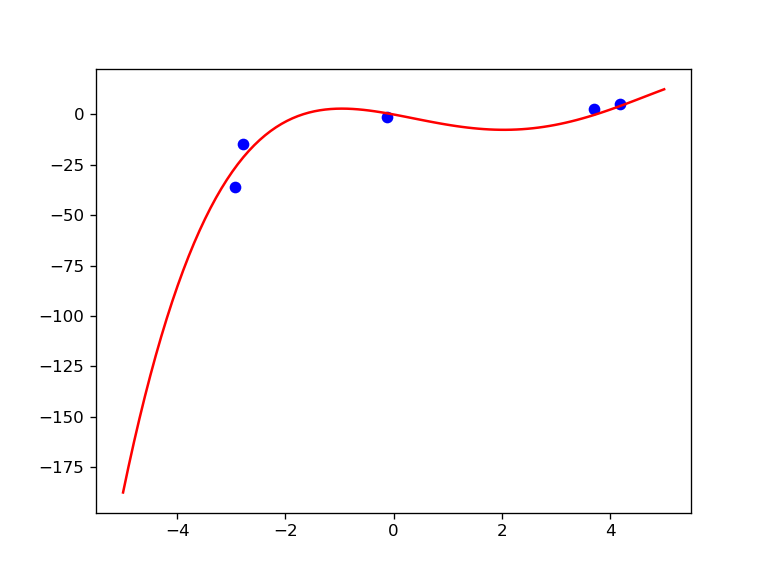

In [2]:
plt.clf()
plt.plot(x,y, 'bo')
plt.plot(x_test, y_test, 'r')
plt.savefig('regression_assignment2017.png')

df = pd.DataFrame(np.column_stack((x,y)), columns=['x', 'y'])
df.to_csv('regression_train_assignment2017.csv')

df_test = pd.DataFrame(np.column_stack((x_test,y_test)), columns=['x', 'y'])
df_test.to_csv('regression_test_assignment2017.csv')

We will consider a 1-dimensional problem as illustrated below. We are given 5 training samples and we want to fit
a line to these samples. Our line has 2 parameters, $\beta_0$ and $\beta_1$. Lets first look at the data and how we can compute a prediction using hand-picked 
$\beta_0$ and $\beta_1$ values. 

In [3]:
import pandas as pd
import matplotlib.pyplot

data_train = pd.read_csv('regression_train_assignment2017.csv')
data_test = pd.read_csv('regression_test_assignment2017.csv')

data_train

,Unnamed: 0,x,y
0,0,-2.780068,-14.450450
1,1,3.707323,2.656608
2,2,-2.932808,-35.990641
3,3,4.186109,5.048556
4,4,-0.115888,-1.451030


### Get the training data as numpy arrays

In [4]:
x_train = data_train['x']# .to_numpy()
y_train = data_train['y']# .to_numpy()

x_test = data_test['x']#.to_numpy()
y_test = data_test['y']#.to_numpy()


### Plot the training data

<IPython.core.display.Javascript object>


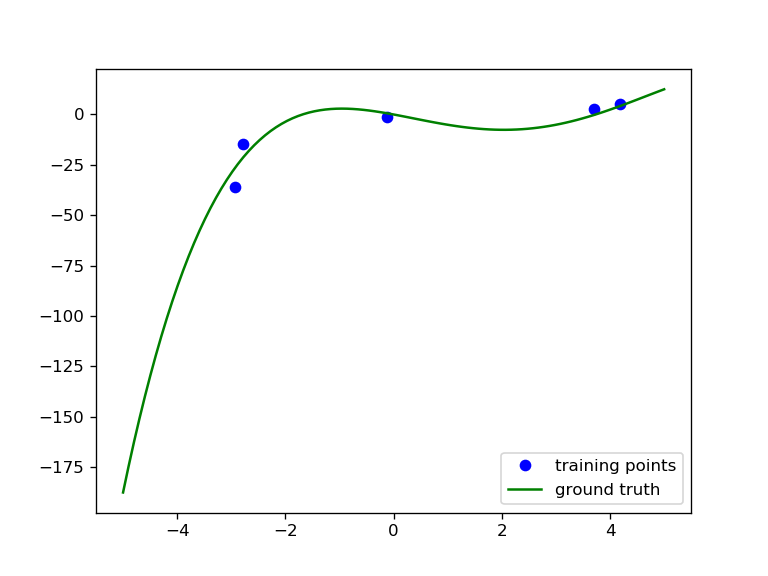

In [5]:
%matplotlib notebook
## get input output vectors from the data frame and plot the data
import matplotlib.pyplot as plt

plt.clf()
plt.plot(x_train,y_train, 'bo')
plt.plot(x_test,y_test, 'g')
plt.legend(('training points', 'ground truth'))
# plt.savefig('trainingdata.png')


# Polynomial Regression

Instead of fitting a line, we can also fit a polynomial. We want to fit $d$th order polynomials which are given by
$$\hat y = \beta_0 + \sum_{i = 1}^n \beta_i x^i$$
Note that, while $\hat y$ is now non-linear in $x$, it is still linear in the parameters $\beta_i$. Hence, we can still apply linear regression here!

 ## Setting up the data/feature matrix
 We can still describe $\hat{y}$ as a scalar product, i.e.,
 $$\hat{y} = \beta_0 + \sum_{i = 1}^n \beta_i x^i = \tilde{\boldsymbol{x}}^T\tilde{\boldsymbol{\beta}}, \textrm{ with } \tilde{\boldsymbol{x}} = \left[\begin{array}{c} 1 \\ x^1 \\ x^2 \\ \vdots \\ x^n  \end{array}\right] \textrm{ and } \tilde{\boldsymbol{\beta}} = \left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{n}  \end{array}\right]$$
 

### Setting up the data matrix in python

In python, we write a small function that does the feature expansion up to a certain degree for a given data set x.

In [7]:
x_train

0   -2.780068
1    3.707323
2   -2.932808
3    4.186109
4   -0.115888
Name: x, dtype: float64

In [8]:
def getPolynomialDataMatrix(x, degree):
    Xtilde = np.ones(x.shape)
#     print(Xtilde)
    for i in range(1,degree + 1):
        Xtilde = np.column_stack((Xtilde, x ** i))
    return Xtilde
# print(x_train, x_train[1]**2)
print(getPolynomialDataMatrix(x_train, 3))

[[ 1.00000000e+00 -2.78006829e+00  7.72877969e+00 -2.14865353e+01]
 [ 1.00000000e+00  3.70732306e+00  1.37442443e+01  5.09543538e+01]
 [ 1.00000000e+00 -2.93280845e+00  8.60136538e+00 -2.52261571e+01]
 [ 1.00000000e+00  4.18610908e+00  1.75235092e+01  7.33553211e+01]
 [ 1.00000000e+00 -1.15888112e-01  1.34300545e-02 -1.55638366e-03]]


## Exercise 9: Fit Polynomials with different degrees
We now want to test different polynomials and see which one fits our data best. First, implement a function 
that computes the optimal beta values given the input data x, output data y and the desired degree of the polynomial. Reuse the getPolynomialDataMatrix given above in your function.

In [10]:
import numpy.linalg as linalg

def getBetaForPolynomialFit(x,y,degree):
    Xtilde = getPolynomialDataMatrix(x, degree)
 
    XX = Xtilde.transpose().dot(Xtilde)
    regularizer = np.eye(XX.shape[0]) * 10 **-6
    betaTilde = linalg.solve(XX + regularizer, Xtilde.transpose().dot(y))
    return betaTilde

Given your getBetaForPolynomialFit function, plot the fitted function for a polynomial 1st, 2nd, 3rd and 4th degree.
Can we now fit the structure of the function better?

<IPython.core.display.Javascript object>


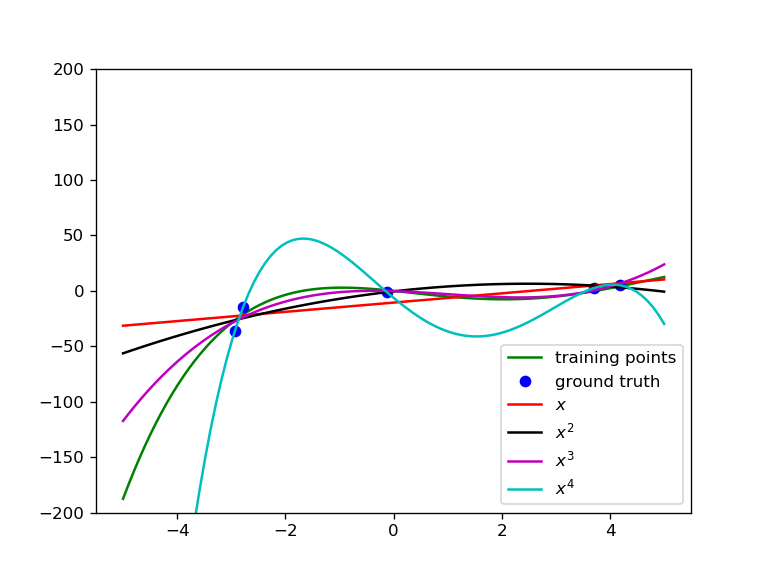

In [11]:
# Lets plot our polynomials function

import matplotlib.pyplot as plt

plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')

beta1 = getBetaForPolynomialFit(x_train, y_train, 1)
Xtest1 = getPolynomialDataMatrix(x_test, 1)
plt.plot(x_test, Xtest1.dot(beta1), 'r')

beta2 = getBetaForPolynomialFit(x_train, y_train, 2)
Xtest2 = getPolynomialDataMatrix(x_test, 2)
plt.plot(x_test, Xtest2.dot(beta2), 'k')

beta3 = getBetaForPolynomialFit(x_train, y_train, 3)
Xtest3 = getPolynomialDataMatrix(x_test, 3)
plt.plot(x_test, Xtest3.dot(beta3), 'm')

beta4 = getBetaForPolynomialFit(x_train, y_train, 4)
Xtest4 = getPolynomialDataMatrix(x_test, 4)
plt.plot(x_test, Xtest4.dot(beta4), 'c')

plt.ylim((-200, 200))
plt.legend(('training points', 'ground truth', '$x$', '$x^2$', '$x^3$', '$x^4$'), loc = 'lower right')

plt.savefig('polynomial.png')

# Bayesian Linear Regression

In [11]:
import numpy.linalg as linalg

def getBayesianBetaForPolynomialFit(x,y,degree, sigma, regLambda):  # Gaussian Bayes rule 2
    # get polynomi
    Xtilde = getPolynomialDataMatrix(x, degree)
 
    XX = Xtilde.transpose().dot(Xtilde)
    regularizer = np.eye(XX.shape[0]) * regLambda * sigma
    betaTilde = linalg.solve(XX + regularizer, Xtilde.transpose().dot(y))
    sigmaBeta = sigma * linalg.inv(XX + regularizer)
    return (betaTilde, sigmaBeta)

As we can see, the predictions for 3rd and 4th order are already quite good. Lets see what happens if we increase 
the order of the polynomial. Repeat the same plots for for example 7, 10 and 12th order polynomials.

<IPython.core.display.Javascript object>


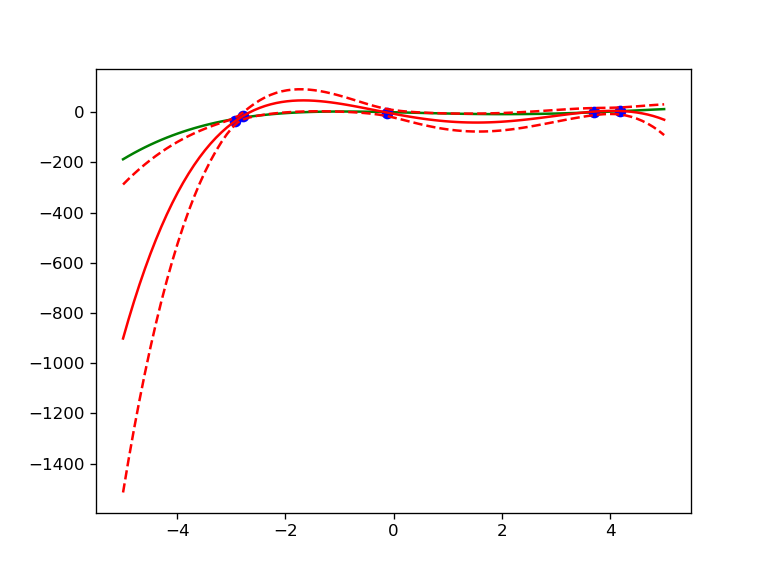

In [12]:
import matplotlib.pyplot as plt

# plot data and ground truth
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')

degree = 4
sigma = 25
regLambda =  10**-8

# compute posterior over weights
beta, sigmaBeta = getBayesianBetaForPolynomialFit(x,y,degree, sigma, regLambda)

# compute predictive mean
X_test = getPolynomialDataMatrix(x_test, degree)
y_pred = X_test.dot(beta)

# Compute predictive variance for each data point
y_sigma = np.zeros((100))
for i in range(100):
    y_sigma[i] = sigma + X_test[i,:].dot(sigmaBeta.dot(X_test[i,:].T))

plt.plot(x_test,y_pred, 'r')
plt.plot(x_test,y_pred + 2 * np.sqrt(y_sigma), 'r--')
plt.plot(x_test,y_pred - 2 * np.sqrt(y_sigma), 'r--')

# we can also sample from the weight distribution different functions and plot them

# betaSamples = np.random.multivariate_normal(beta, sigmaBeta, 10)
# y_samples = X_test.dot(betaSamples.T)

# plt.plot(x_test,y_samples, 'k-.')


In [51]:
betaSamples.shape

(10, 5)